# Machine Learning Algorithm Comparison 

Link for the dataset used - https://www.kaggle.com/c/titanic/data

**Note:** The dataset is pre-divided into `train.csv` and `test.csv`. However, since the `test.csv` file lacks survival labels (as it is intended for competition evaluation), it cannot be used to evaluate model performance. Instead, the `train.csv` file will be used to create both training and testing subsets, ensuring labelled data is available for model evaluation. Both files will be loaded and processed as needed, with a custom train-test split applied to the `train.csv` file for this project.

### 1. Introduction 

#### 1.1 Brief introduction and defining the problem

The sinking of the RMS Titanic on April 15, 1912, remains one of the most infamous maritime disasters in modern history, claiming the lives of over 1,500 passengers and crew. Beyond its historical significance, this tragedy exposed systemic gaps in maritime safety regulations, leading to major reforms. Factors such as gender, age, socioeconomic status, and ticket fare played critical roles in determining ones survival outcomes.

In this project I aim to explore the Kaggle Titanic dataset and utilise machine learning models to predict passenger survival. Through data analysis and supervised learning techniques, my goal is to identify key features influencing survival rate, compare and evaluate the performance of different machine learning models, and draw conclusions into the factors that contributed survival possibilities. 

### 2. Setup and prerequisites

#### 2.1 Installing required libraries

In [12]:
# Install required libraries (only if not already installed)
! pip install pandas numpy scikit-learn matplotlib kagglehub seaborn streamlit plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


#### 2.2 Importing the libraries 

In [2]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

### 3. Data loading and exploration 

**Note:** 

The Titanic dataset is originally divided into `train.csv` and `test.csv`. However, the `test.csv` dataset does not include survival labels, as it is intended for competition use where the goal is to predict survival outcomes and compare them against the hidden labels. This makes it unsuitable for evaluating model performance directly. 

To address this, I will split the `train.csv` dataset into custom training and evaluation subsets (80% training and 20% testing). This approach ensures that both subsets include survival labels (`Survived`), enabling me to train the models on one subset and assess their performance on the other.

Alternatively, I could have employed **K-Fold Cross-Validation**, a widely-used technique that splits the data into multiple folds, training and testing the model on different combinations of these folds to ensure robustness. While effective, I have chosen a simpler train-test split for clarity and ease of implementation, aligning with the objectives of this project.

#### 3.1 Loading the dataset

In [4]:
# Load the Titanic datasets
train_data = pd.read_csv("Titanic Dataset/train.csv")

# Display the first few rows
display(train_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3.2 Checking missing values

In [21]:
from IPython.display import display

# Display missing values
display(train_data.isnull().sum())

# Display dataset info
train_data.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The output above indicates the presence of missing values in the 'Age', 'Cabin', and 'Embarked' columns. These missing values will require appropriate handling to ensure the dataset is complete and suitable for analysis. 

#### 3.3 Dataset overview 

In [17]:
# Summary statistics of numerical columns
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations from summary statistics: 

The summary statistics provide an overview of the numerical features in the dataset including: 

1. Passenger count: The dataset contains data for 891 passengers, as shown by the count in passengerId. 

2. Age: The average age is seen to be approximately 29.7 years, with a minimum age of 0.42 (most likely a new born baby) and a maximum age of 80 years. 

3. Fare: The average fare paid was 32.2, ranging from 0 (likely third-class passengers) to 512.3, indicating significant variability based on passenger class and possibly other factors. 

4. SibSp and Parch: Most passengers traveled alone, as shown by the median values of 0 for both "SibSp" (Sibling/spouses on board) and "Parch" (Parents/Children on board) columns. 

5. Missing data: The presence of missing values in columns like "Age" and "Fare" highlights areas requiring data preprocessing. 

These insights provide a foundation for identifying trends and patterns in the data wherever possible.

##### 3.3.1 Types of features 

Along with the obvious numerical features, the Titanic dataset contains a mix of categorical, ordinal, continuous, and alphanumeric features. Understanding these feature types is essential for selecting appropriate preprocessing methods and building machine learning models. Below is a classification of the features:

1. **Categorical Features**:
   - **Definition**: These features represent categories without a specific order.
   - **Examples**: 
     - `Sex`: Male or Female.
     - `Embarked`: Port of embarkation (`C`, `Q`, `S`).
   - **Relevance**: Useful for identifying relationships between passenger characteristics and survival.

2. **Ordinal Features**:
   - **Definition**: These features represent categories with a meaningful order or ranking.
   - **Examples**:
     - `Pclass`: Passenger class (`1`, `2`, `3`), where `1` represents the highest class.
   - **Relevance**: Indicates socioeconomic status and likely influences survival probability.

3. **Continuous Features**:
   - **Definition**: Numerical values that can take any value within a range.
   - **Examples**:
     - `Age`: Passenger's age.
     - `Fare`: Fare paid by the passenger.
   - **Relevance**: Useful for detecting trends like the survival rate of different age groups or fare brackets.

4. **Discrete Features**:
   - **Definition**: Numerical values that are whole numbers and represent counts.
   - **Examples**:
     - `SibSp`: Number of siblings or spouses aboard.
     - `Parch`: Number of parents or children aboard.
   - **Relevance**: Helps identify family dynamics and their effect on survival.

5. **Alphanumeric Features**:
   - **Definition**: Features containing text or a combination of text and numbers.
   - **Examples**:
     - `Name`: Passenger's name.
     - `Ticket`: Ticket number.
     - `Cabin`: Cabin number.
   - **Relevance**: `Name` can be used to extract titles, while `Ticket` and `Cabin` might offer limited information without further processing.

6. **Target Feature**:
   - **Definition**: The variable I aim to predict.
   - **Example**:
     - `Survived`: Binary outcome indicating survival (`1` for survived, `0` for not survived).
   - **Relevance**: This is the target variable for the machine learning models.

By identifying these feature types, I can prepare suitable preprocessing strategies, such as encoding categorical variables, normalising continuous variables, or engineering new features to enhance model performance.

In [7]:
# Display data types of each feature
print("Feature Data Types:")
print(train_data.dtypes)

# Count unique values for categorical and ordinal features
print("\nUnique Values in Selected Features:")
print("Sex:", train_data['Sex'].unique())
print("Embarked:", train_data['Embarked'].unique())
print("Pclass:", train_data['Pclass'].unique())

# Summary statistics for numerical (continuous and discrete) features
print("\nSummary Statistics for Numerical Features:")
print(train_data[['Age', 'Fare', 'SibSp', 'Parch']].describe())

# Checking for alphanumeric features
print("\nSample Values from Alphanumeric Features:")
print("Name:", train_data['Name'].head(3).tolist())
print("Ticket:", train_data['Ticket'].head(3).tolist())
print("Cabin:", train_data['Cabin'].head(3).tolist())

Feature Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Unique Values in Selected Features:
Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]
Pclass: [3 1 2]

Summary Statistics for Numerical Features:
              Age        Fare       SibSp       Parch
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    0.523008    0.381594
std     14.526497   49.693429    1.102743    0.806057
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     38.000000   31.000000    1.000000    0.000000
max     80.000000  512.329200    8.000000    6.000000

Sample Values from Alphanumeric Features:
Name: ['Braun

### 4. Exploratory Data Analysis (EDA)

#### 4.1 Initial Data Assessment

Visualising the extent of missing data helps identify which features require attention during data cleaning.

In [13]:
# Counting missing values per column
missing_counts = train_data.isnull().sum()
print("Missing Values Per Column:")
print(missing_counts)

Missing Values Per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


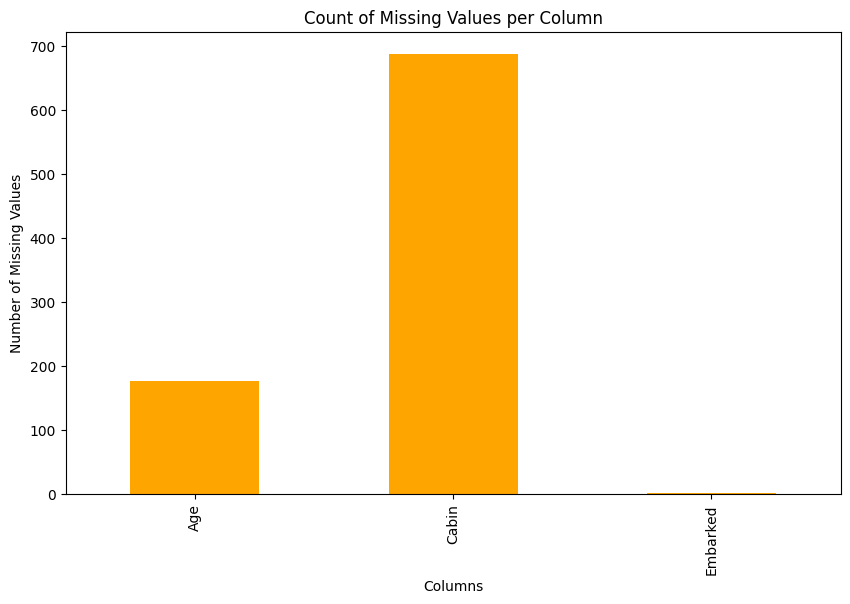

In [15]:
# Visualising missing values with a bar plot
missing_counts = missing_counts[missing_counts > 0]  # Filter columns with missing data
missing_counts.plot(kind='bar', figsize=(10, 6), color="orange")
plt.title("Count of Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

As we have visualised the data now we can see that the `Age` column has approximately 19.8% missing values, the `Cabin` column contains 77% missing values, and the `Embarked` column has only 2 missing entries. The `Age` column will require thoughtful imputation to retain its value in the analysis, while the high percentage of missing values in the `Cabin` column suggests it may need to be dropped or re-engineered. For the `Embarked` column, the missing values can efficiently be replaced with the most frequently occurring value in that column, which is "S" (Southampton). 

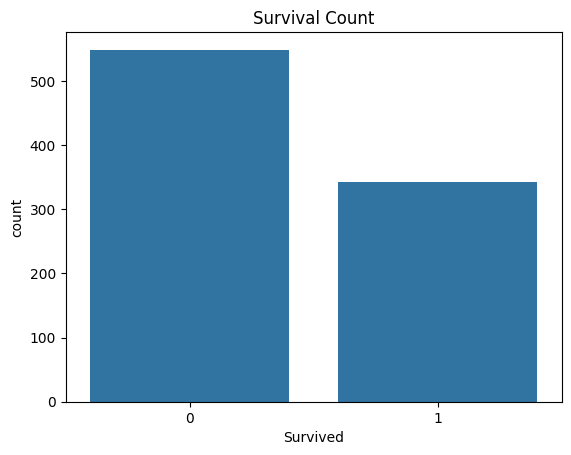

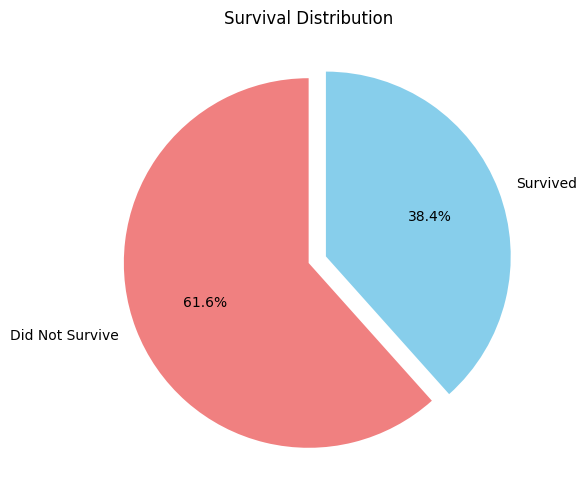

In [24]:
#Visualise survival distribution in a bar chart 
sns.countplot(data=train_data, x='Survived')
plt.title("Survival Count")
plt.show()

#Visualise survival distribution in a pie chart 
# Calculate proportions for survival
survival_counts = train_data['Survived'].value_counts()
labels = ['Did Not Survive', 'Survived']
colors = ['lightcoral', 'skyblue']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
plt.title("Survival Distribution")
plt.show()

It is very unfortunate but clear to see from both the pie chart and bar graph that only 38.4% of passengers survived, which is roughly 350 out of the 891 passengers in the dataset. This indicates that the majority of passengers, around 61.6%, did not survive the tragedy.

To gain deeper insights, it’s important to investigate how various features of the dataset influenced the survival rate. Certain characteristics such as Sex, Passenger Class (Pclass), Age, and Port of Embarkation might have played a significant role in determining survival odds. By analysing these features, we can uncover potential patterns or trends that contributed to survival.

Next, we will delve into the survival rates by feature categories, starting with Sex, Pclass, and Age, to identify any disparities or correlations that can help us better understand the dataset.


#### 4.2 Univariate Analysis 

Univariate analysis involves examining a single variable at a time to understand its distribution, characteristics, and patterns. This type of analysis helps identify key statistical measures like the mean, median, and variance while also detecting trends, outliers, and missing values. Visual tools such as histograms, pie charts, and box plots are commonly used for this purpose. In the context of the Titanic dataset, univariate analysis allows us to explore variables such as `Age`, `Pclass`, and `Fare` individually, providing insights into their standalone behaviour and preparing us for more complex multivariate analyses.


##### 4.2.1 Analysis of Categorical Features

The categorical features include `Sex`, `Pclass`, and `Embarked`. Their distribution and survival relationships are visualised below.

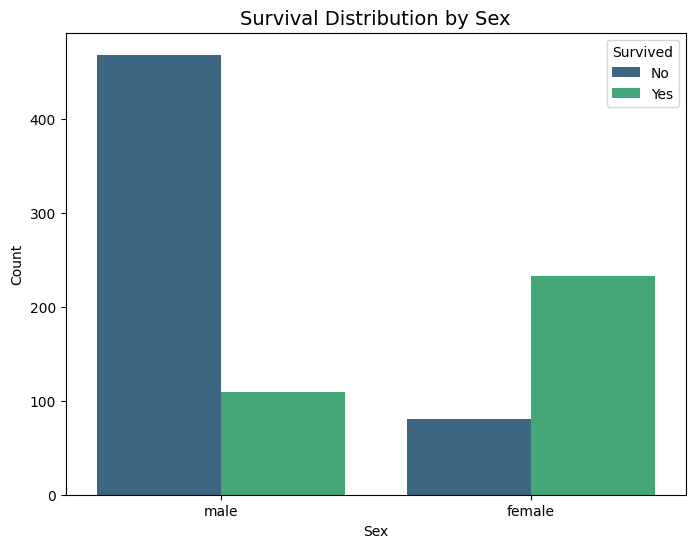

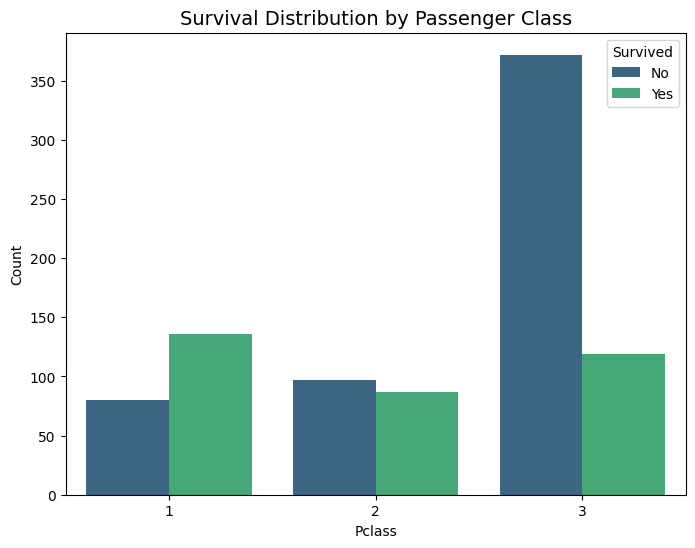

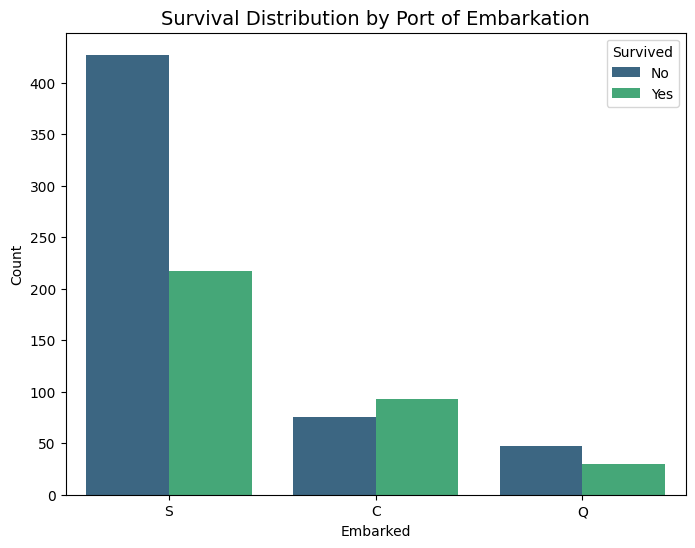

In [16]:
# Countplot for Survival by Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x="Sex", hue="Survived", palette="viridis")
plt.title("Survival Distribution by Sex", fontsize=14)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

# Countplot for Survival by Pclass
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x="Pclass", hue="Survived", palette="viridis")
plt.title("Survival Distribution by Passenger Class", fontsize=14)
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

# Countplot for Survival by Embarked
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x="Embarked", hue="Survived", palette="viridis")
plt.title("Survival Distribution by Port of Embarkation", fontsize=14)
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

**Insights**:
- Female passengers were more likely to survive.
- First-class passengers had the highest survival rate.
- Passengers boarding at `C` were more likely to survive.

---


##### 4.2.2 Analysis of Numerical Features

The numerical features include `Age` and `Fare`. Their distributions and relationships with survival are explored below.

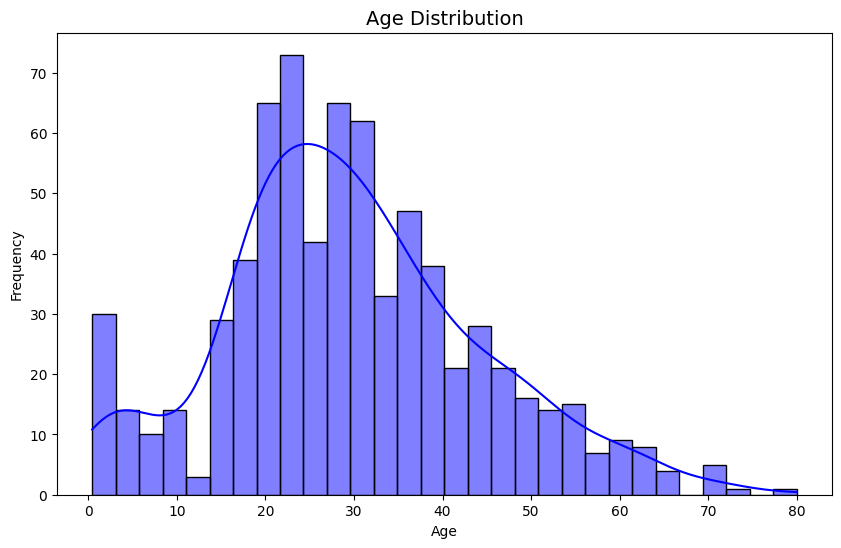

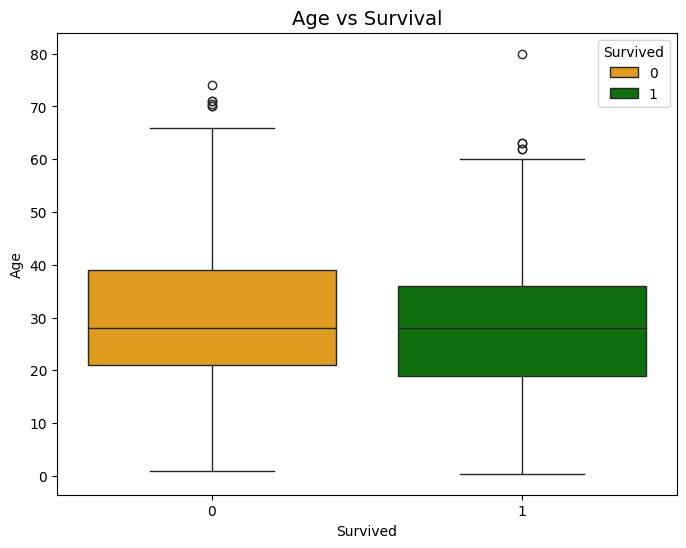

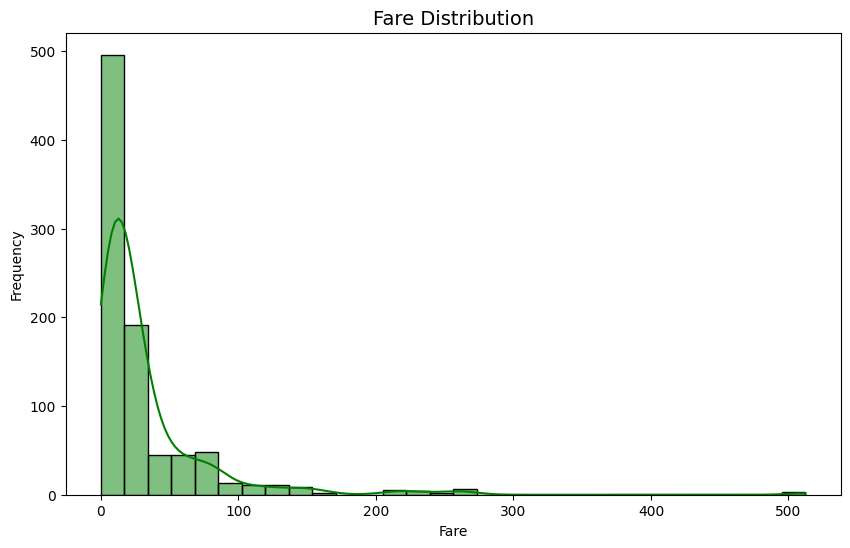

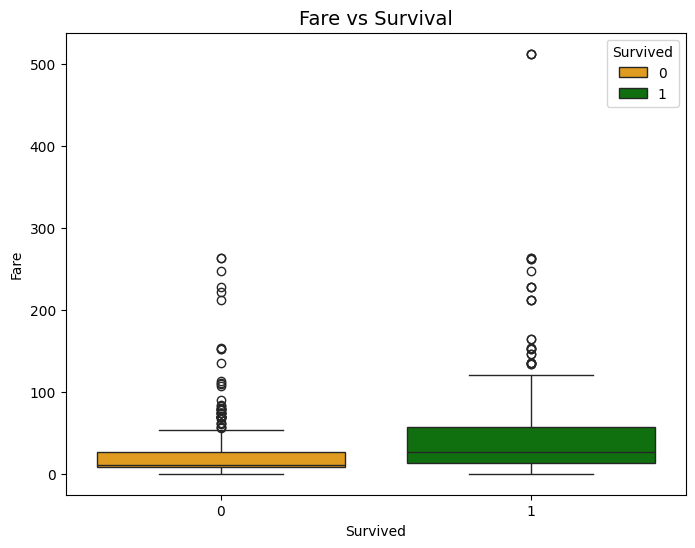

In [18]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(train_data["Age"].dropna(), bins=30, kde=True, color="blue")
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Box plot of Age vs Survival
plt.figure(figsize=(8, 6))
sns.boxplot(x="Survived", y="Age", data=train_data, hue="Survived", palette={0: "orange", 1: "green"})
plt.title("Age vs Survival", fontsize=14)
plt.xlabel("Survived")
plt.ylabel("Age")
plt.legend(title="Survived", loc="upper right")
plt.show()

# Distribution of Fare
plt.figure(figsize=(10, 6))
sns.histplot(train_data["Fare"], bins=30, kde=True, color="green")
plt.title("Fare Distribution", fontsize=14)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

# Box plot of Fare vs Survival
plt.figure(figsize=(8, 6))
sns.boxplot(x="Survived", y="Fare", data=train_data, hue="Survived", palette={0: "orange", 1: "green"})
plt.title("Fare vs Survival", fontsize=14)
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.legend(title="Survived", loc="upper right")
plt.show()


**Insights**:
- Passengers aged 20-40 were most common, but children had a higher survival rate.
- Higher fares were associated with better survival chances.

#### 4.3 Multivariate Analysis

Multivariate analysis examines the relationships between multiple features to uncover complex patterns that influence survival. By doing this, we aim to gain deeper insights for feature engineering and model training.

##### 4.3.1 Survival by Sex and Pclass

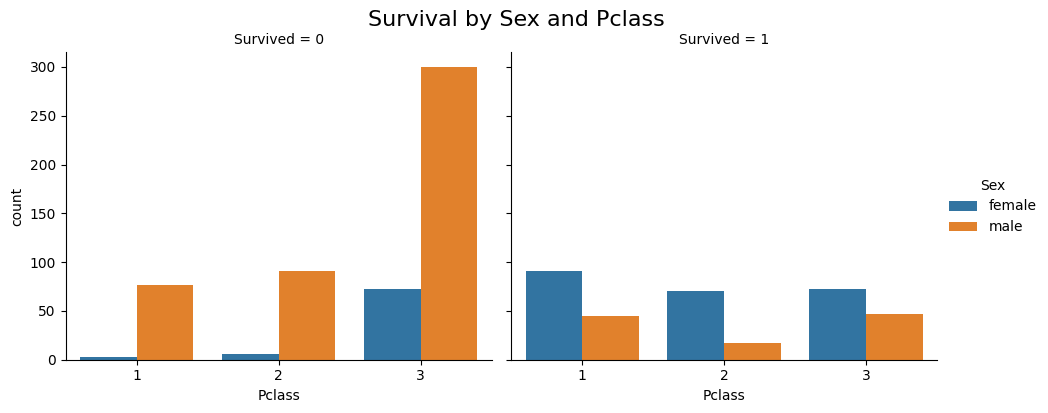

In [19]:
# Multivariate analysis: Survival by Sex and Pclass
sns.catplot(data=train_data, x="Pclass", hue="Sex", col="Survived", kind="count", height=4, aspect=1.2)
plt.suptitle("Survival by Sex and Pclass", y=1.02, fontsize=16)
plt.show()

Observations:

This plot shows the survival distribution across passenger classes (Pclass) and genders (Sex).
Example Insight: Women in first and second classes had significantly higher survival rates compared to men in any class.

##### 4.3.2 Survival by Age and Pclass

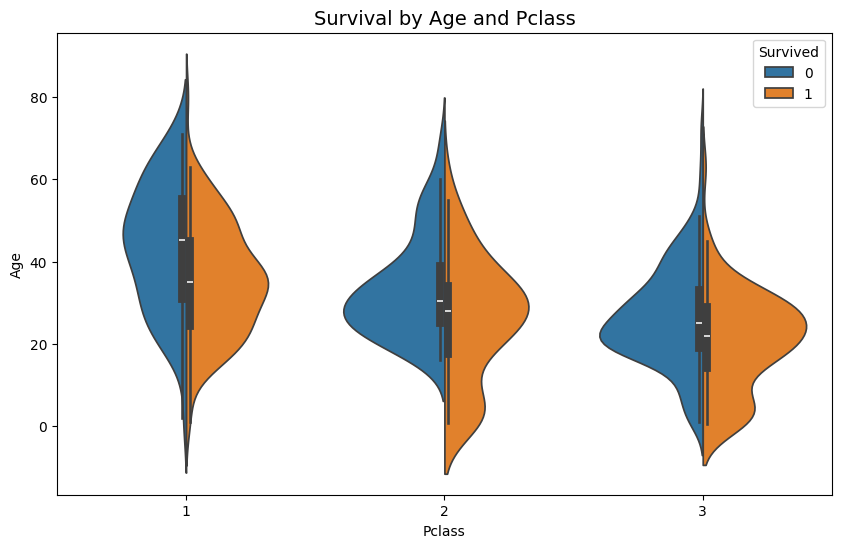

In [20]:
# Multivariate analysis: Survival by Age and Pclass
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_data, x="Pclass", y="Age", hue="Survived", split=True)
plt.title("Survival by Age and Pclass", fontsize=14)
plt.show()


Observations:

Violin plots highlight the distribution of ages among survivors and non-survivors in each passenger class.
Example Insight: Younger passengers in first class and children in second class show higher survival rates.

##### 4.3.3 Correlation Heatmap

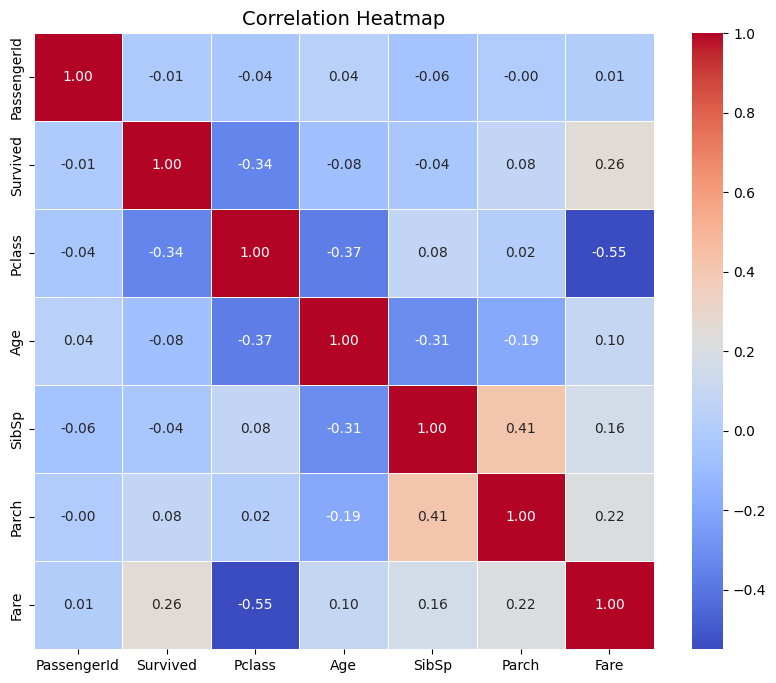

In [22]:
# Compute the correlation matrix for numeric columns
correlation_matrix = train_data.select_dtypes(include=['float64', 'int64']).corr()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


Observations:

The heatmap provides a correlation matrix of numerical variables.
Example Insight: Fare is strongly correlated with Pclass, suggesting that higher fares are associated with higher survival rates.

##### 4.3.4 Pairwise Relationships

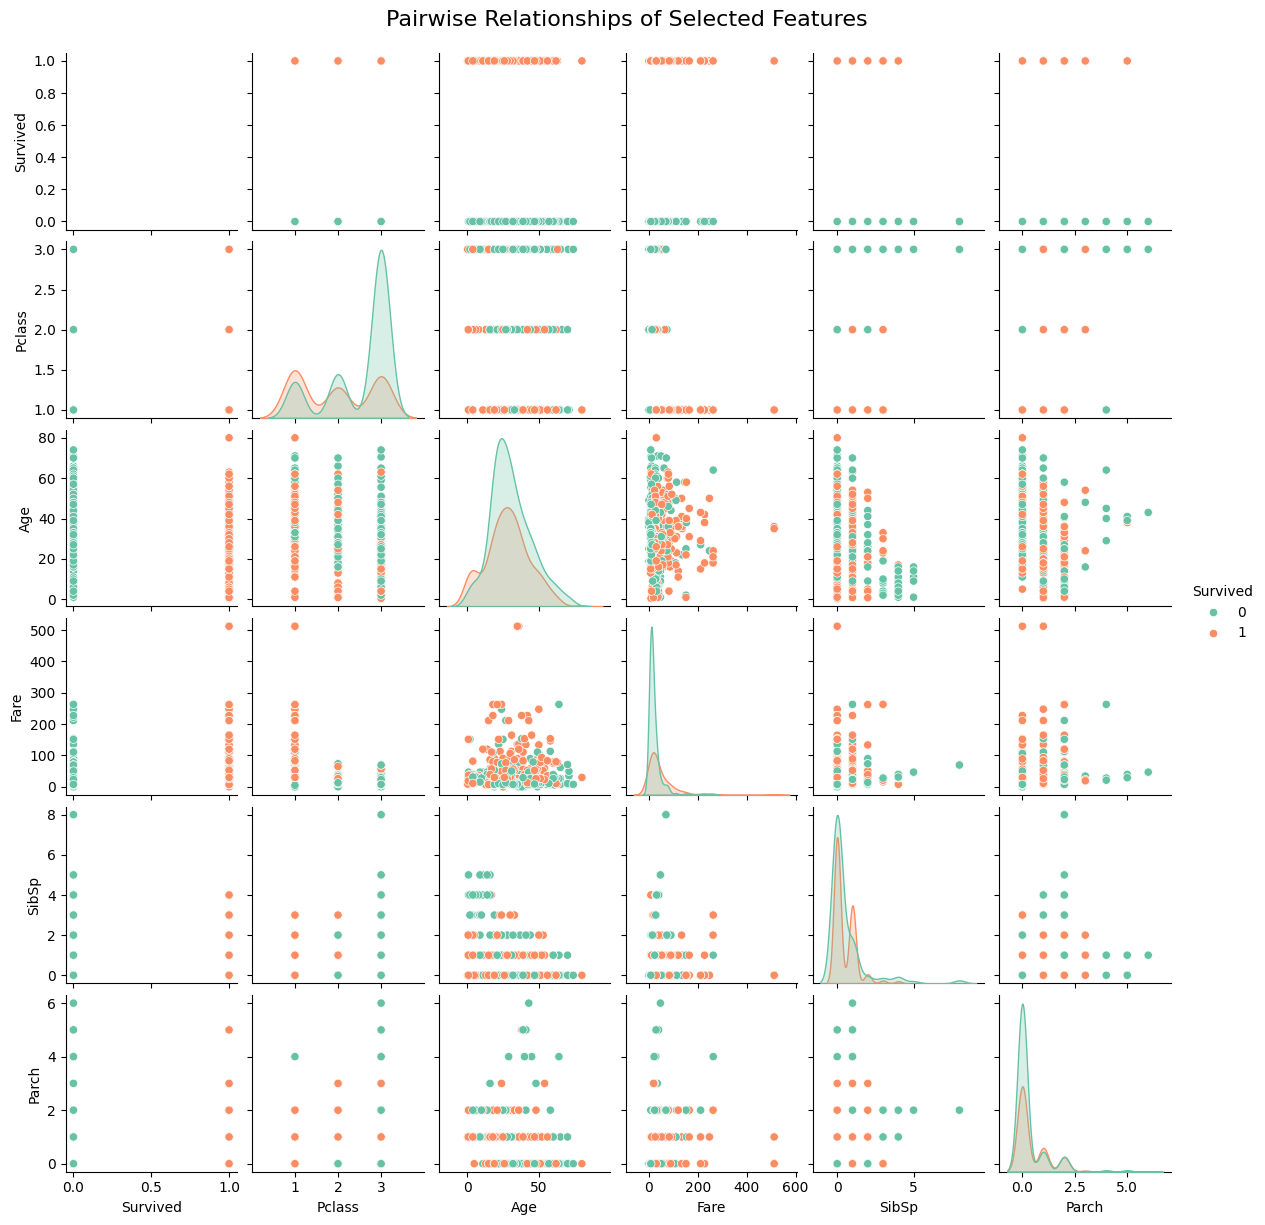

In [23]:
# Pair plot for selected features
selected_features = ["Survived", "Pclass", "Age", "Fare", "SibSp", "Parch"]
sns.pairplot(data=train_data, vars=selected_features, hue="Survived", palette="Set2", diag_kind="kde", height=2)
plt.suptitle("Pairwise Relationships of Selected Features", y=1.02, fontsize=16)
plt.show()

Observations:

Pair plots allow us to visualise the relationships between numerical features.
Example Insight: Passengers with smaller family sizes (SibSp + Parch) appear to have higher survival rates.

Summary of Multivariate Analysis
From the above visualisations:

Pclass and Sex: Survival is higher among females and passengers in higher classes.
Age and Pclass: Younger passengers and those in first or second class had better survival odds.
Correlation Insights: Features like Fare and Pclass are strongly related, offering potential for feature engineering.
Family Size: Passengers travelling with smaller families seem more likely to survive, suggesting a need to engineer a FamilySize feature.


#### Key Findings

### 5. Data cleaning and preprocessing 

#### 5.1 The 4 C's of Data Cleaning  

##### 5.1.1 Correcting 

##### 5.1.2 Completing 

##### 5.1.3 Creating 

##### 5.1.4 Converting 

#### 5.2 Feature Engineering 

#### 5.3 Encoding categorical variables 

### 6. Model Preparation 

#### 6.1 Splitting the dataset 

#### 6.2 Feature Selection 

#### 6.3 Scaling Feature (Optional)

### 7. Machine learning models 

### 8. Model Evaluation 